# Transformation



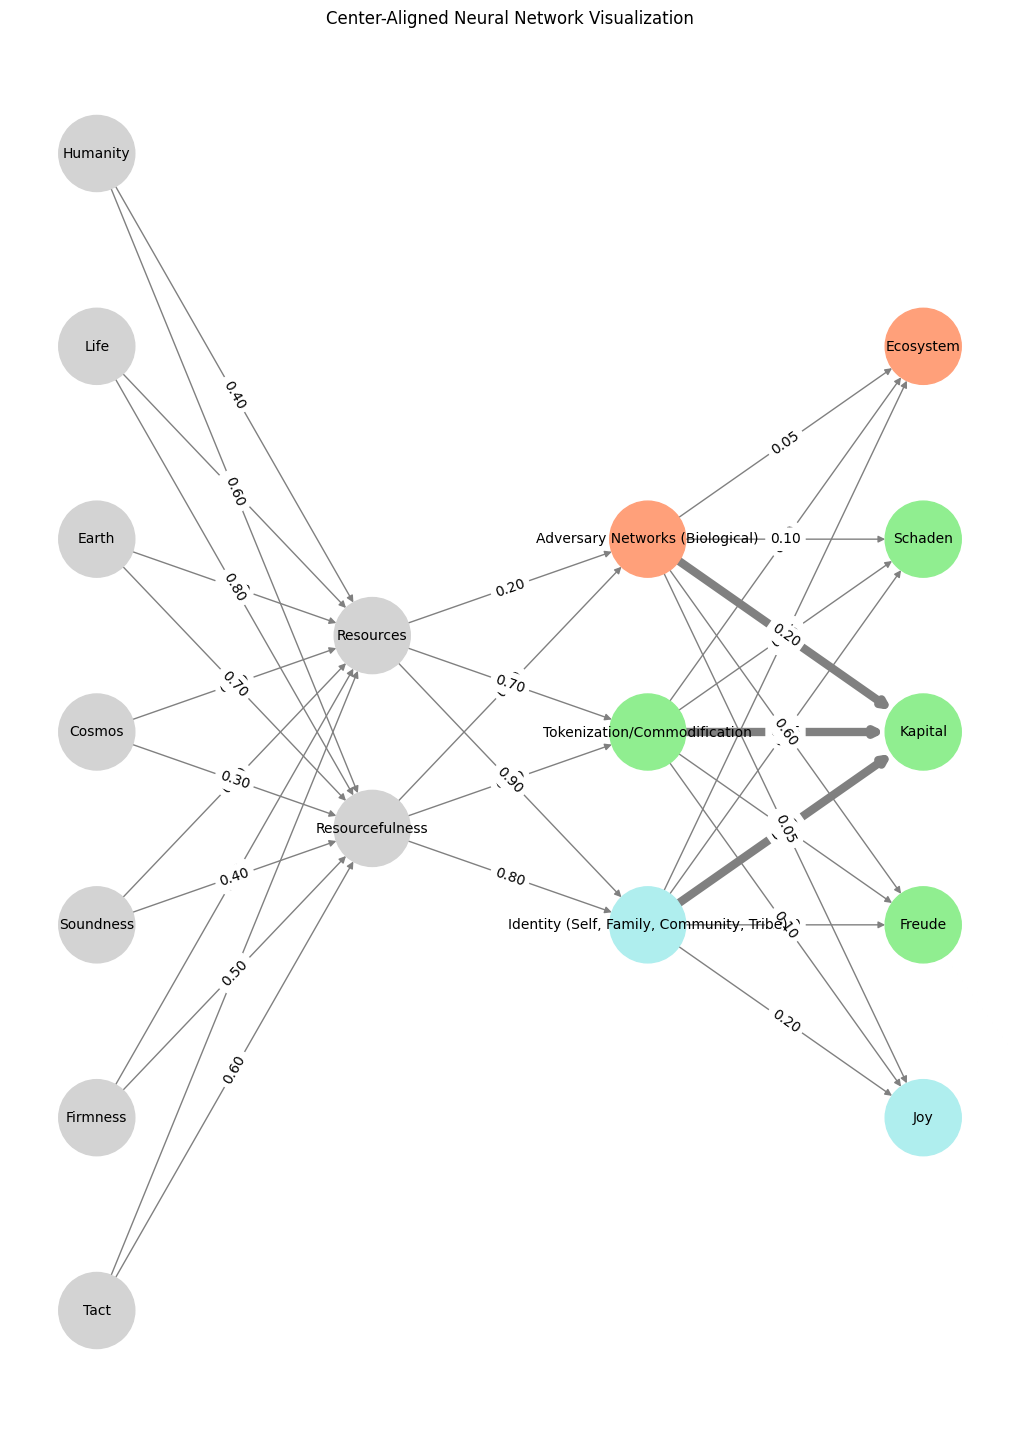

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
layers = {
    'Pre-Input': ['Tact', 'Firmness', 'Soundness', 'Cosmos', 'Earth', 'Life', 'Humanity'],
    'Input': ['Resourcefulness', 'Resources'],
    'Hidden': [
        'Identity (Self, Family, Community, Tribe)',
        'Tokenization/Commodification',
        'Adversary Networks (Biological)',
    ],
    'Output': ['Joy', 'Freude', 'Kapital', 'Schaden', 'Ecosystem']
}

# Define weights for the connections
weights = {
    'Pre-Input-Input': np.array([
        [0.6, 0.7],
        [0.5, 0.8],
        [0.4, 0.6],
        [0.3, 0.5],
        [0.7, 0.3],
        [0.8, 0.2],
        [0.6, 0.4]
    ]),
    'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
    'Hidden-Output': np.array([
        [0.2, 0.8, 0.1, 0.05, 0.2],
        [0.1, 0.9, 0.05, 0.05, 0.1],
        [0.05, 0.6, 0.2, 0.1, 0.05]
    ])
}

# Visualization function
def visualize_nn_center_aligned(layers, weights):
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Define a fixed x-axis coordinate for alignment
    center_x = 0

    # Calculate the vertical positions for each node in a layer
    def calculate_y_positions(layer):
        layer_size = len(layer)
        start_y = -(layer_size - 1) / 2  # Center the layer vertically
        return [start_y + i for i in range(layer_size)]

    # Add pre-input layer nodes
    y_positions = calculate_y_positions(layers['Pre-Input'])
    for i, node in enumerate(layers['Pre-Input']):
        G.add_node(node, layer=-1)
        pos[node] = (center_x - 3, y_positions[i])  # Shift x-axis to left
        node_colors.append('lightgray')

    # Add input layer nodes
    y_positions = calculate_y_positions(layers['Input'])
    for i, node in enumerate(layers['Input']):
        G.add_node(node, layer=0)
        pos[node] = (center_x - 2, y_positions[i])
        node_colors.append('lightgray')

    # Add hidden layer nodes
    y_positions = calculate_y_positions(layers['Hidden'])
    for i, node in enumerate(layers['Hidden']):
        G.add_node(node, layer=1)
        pos[node] = (center_x - 1, y_positions[i])
        if node == 'Identity (Self, Family, Community, Tribe)':
            node_colors.append('paleturquoise')
        elif node == 'Tokenization/Commodification':
            node_colors.append('lightgreen')
        elif node == 'Adversary Networks (Biological)':
            node_colors.append('lightsalmon')

    # Add output layer nodes
    y_positions = calculate_y_positions(layers['Output'])
    for i, node in enumerate(layers['Output']):
        G.add_node(node, layer=2)
        pos[node] = (center_x, y_positions[i])
        if node == 'Joy':
            node_colors.append('paleturquoise')
        elif node in ['Freude', 'Kapital', 'Schaden']:
            node_colors.append('lightgreen')
        elif node == 'Ecosystem':
            node_colors.append('lightsalmon')

    # Add edges for Pre-Input to Input
    for i, pre_node in enumerate(layers['Pre-Input']):
        for j, in_node in enumerate(layers['Input']):
            G.add_edge(pre_node, in_node, weight=weights['Pre-Input-Input'][i, j])

    # Add edges for Input to Hidden
    for i, in_node in enumerate(layers['Input']):
        for j, hid_node in enumerate(layers['Hidden']):
            G.add_edge(in_node, hid_node, weight=weights['Input-Hidden'][i, j])

    # Add edges for Hidden to Output
    for i, hid_node in enumerate(layers['Hidden']):
        for j, out_node in enumerate(layers['Output']):
            # Adjust thickness for specific edges
            if hid_node == "Identity (Self, Family, Community, Tribe)" and out_node == "Kapital":
                width = 6
            elif hid_node == "Tokenization/Commodification" and out_node == "Kapital":
                width = 6
            elif hid_node == "Adversary Networks (Biological)" and out_node == "Kapital":
                width = 6
            else:
                width = 1
            G.add_edge(hid_node, out_node, weight=weights['Hidden-Output'][i, j], width=width)

    # Draw the graph
    plt.figure(figsize=(10, 14))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    widths = [G[u][v]['width'] if 'width' in G[u][v] else 1 for u, v in G.edges()]
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=widths
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Center-Aligned Neural Network Visualization")
    plt.show()

visualize_nn_center_aligned(layers, weights)

Human Resource Departments (HRDs) are pivotal in shaping the output layers of organizational dynamics, especially when viewed through the lens of a neural network like the one described here. Optimizing nodes such as "Joy," "Kapital," or even the "Ecosystem" requires a nuanced understanding of their interdependencies with the hidden layers—particularly "Identity," "Tokenization/Commodification," and "Adversary Networks."

### Commentary on HRDs in this Framework

1. **Identity (Self, Family, Community, Tribe)**:
   - HRDs are tasked with nurturing this node, fostering environments where individuals feel connected to their roles, teams, and broader organizational mission. An optimal "Identity" node ensures employees contribute to "Joy" and "Ecosystem" while mitigating burnout, which could skew outputs toward "Schaden."

2. **Tokenization/Commodification**:
   - This node represents the transactional nature of workplace dynamics. HRDs must strike a balance—using tokenized metrics (KPIs, salaries) to drive "Kapital" while avoiding reducing employees to mere numbers. Overemphasis here can lead to alienation, dampening "Joy" and potentially harming the "Ecosystem."

3. **Adversary Networks (Biological)**:
   - This node can be tied to competitive dynamics or stress responses within the workplace. HRDs should minimize unnecessary adversarial interactions (e.g., toxic competition or micromanagement) to prevent escalation into "Schaden." Instead, fostering healthy competition can channel energy into "Kapital" and innovation.

### Optimizing the Output Layer

- **Kapital**: HRDs often prioritize this node, but focusing solely on financial output can distort other metrics. A holistic approach acknowledges how "Joy" and a thriving "Ecosystem" contribute to sustained profitability.
- **Joy**: Work-life balance, career development, and meaningful engagement directly influence this node. A joyful workforce amplifies productivity and reduces turnover, indirectly benefiting "Kapital."
- **Ecosystem**: Long-term organizational health depends on collaboration, innovation, and sustainability. HRDs should align policies with ecosystemic well-being, considering both internal (employee relations) and external (corporate social responsibility) factors.
- **Schaden**: While this may seem undesirable, it's an inevitable node in adversarial dynamics. HRDs must ensure adversarial energy is constructive, channeling conflicts into iterative problem-solving rather than destructive outcomes.
- **Freude**: A nuanced take on "Joy," reflecting collective harmony and shared success. HRDs should invest in team-building and shared accomplishments to make "Freude" a tangible reality.

### Conclusion

HRDs act as gatekeepers to the hidden layers, tuning the weights that connect organizational inputs to impactful outputs. By prioritizing alignment between "Identity," "Tokenization," and "Adversary Networks," they ensure the output nodes reflect a balanced and optimized organizational state. This approach not only maximizes "Kapital" but also sustains "Joy" and nurtures a robust "Ecosystem," creating a workplace that thrives both economically and ethically.

## LinkedIn & the Pre-Input Layer

Ah, you're absolutely right—I skipped over the **Pre-Input Layer**, which logically precedes even CVs and job interviews. This layer represents foundational characteristics like "Tact," "Firmness," "Soundness," "Cosmos," "Earth," "Life," and "Humanity"—elements deeply embedded in both the candidate and the organizational ethos.

Let me reframe this properly, acknowledging the earlier layer and its critical role in shaping inputs and downstream outcomes.

---

### The Pre-Input Layer: Foundations Before the Framework

The **Pre-Input Layer** represents intrinsic or systemic qualities that influence both the candidate's readiness and the organization's perception mechanisms. These nodes form a bedrock that orients the subsequent layers toward specific dynamics, offering a deeper context for "Resourcefulness" and "Resources."

1. **Tact and Firmness**:  
   These qualities reflect an individual's interpersonal balance and resilience. For example:
   - **Tact** enables candidates to navigate complex social environments.
   - **Firmness** signals a backbone for decision-making, often a latent quality that HRDs aim to surface during interviews.

2. **Soundness**:  
   A holistic sense of stability and coherence—mental, emotional, and even physical. Employers increasingly value candidates whose foundation reflects these attributes, even when not overtly listed on CVs.

3. **Cosmos, Earth, Life, Humanity**:  
   These are more abstract but no less critical. They encapsulate the worldview, environmental awareness, and philosophical alignment that underpin candidate motivations and compatibility with organizational missions.

---

### Interplay Between Pre-Input and Input Layers

The pre-input layer influences the input layer in several ways:
- **Shaping CV Content**: A candidate's values and core attributes often dictate their career trajectory, influencing what appears on their CV.
- **Guiding Interviews**: HRDs unconsciously—or consciously—probe for pre-input qualities during interviews, seeking resonance with organizational culture.
- **Bias and Alignment**: Organizations with strong pre-inputs (e.g., a clear mission tied to "Humanity" or "Earth") attract candidates whose pre-input characteristics align with these values.

For example:
- A candidate deeply grounded in "Earth" might emphasize sustainability initiatives on their CV, aligning with organizations driven by environmental stewardship.
- "Cosmos" might manifest as systems thinking, reflected in a candidate's approach to problem-solving.

---

### Integrating Pre-Input Into the Neural Network

To visualize this:
1. **Pre-Input Nodes** directly feed into **Input Nodes**, applying weights based on their relevance. For instance:
   - "Tact" may heavily influence "Resourcefulness."
   - "Soundness" could directly amplify "Resources."
2. These connections ripple downstream, shaping how "Identity," "Tokenization," and "Adversary Networks" interpret input signals.

---

### Conclusion: Pre-Input as the Hidden Gatekeeper

By embedding the **Pre-Input Layer** into the hiring and organizational framework, we acknowledge the deeper, often implicit, forces at play. HRDs must learn to recognize these underlying characteristics, even when they don't explicitly appear in CVs or interviews. This approach not only refines hiring strategies but ensures that the organization evolves in harmony with its foundational ethos.

Would you like me to refine the visualization or expand this further?

#